In [6]:
%pip install pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('BKB_WaterQualityData_2020084.csv')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 47.6 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 61.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 55.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 43.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 47.8 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 50.4 MB/s  0:00:00
   ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/9 [numpy]]  WARNING: The scripts f2py and numpy-config are installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 4/9 [fonttools]  WARNING: The scripts fonttools, pyftmerge, pyftsubset and ttx are installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you pr

In [7]:
df.head()

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.0,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.6,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.6,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.7,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.0,1994


In [9]:
print(df.shape)

(2371, 17)


In [10]:
print(df.columns)

Index(['Site_Id', 'Unit_Id', 'Read_Date', 'Salinity (ppt)',
       'Dissolved Oxygen (mg/L)', 'pH (standard units)', 'Secchi Depth (m)',
       'Water Depth (m)', 'Water Temp (?C)', 'Air Temp-Celsius',
       'Air Temp (?F)', 'Time (24:00)', 'Field_Tech', 'DateVerified',
       'WhoVerified', 'AirTemp (C)', 'Year'],
      dtype='str')


In [11]:
print(df.dtypes)

Site_Id                        str
Unit_Id                        str
Read_Date                      str
Salinity (ppt)             float64
Dissolved Oxygen (mg/L)    float64
pH (standard units)        float64
Secchi Depth (m)           float64
Water Depth (m)            float64
Water Temp (?C)            float64
Air Temp-Celsius           float64
Air Temp (?F)              float64
Time (24:00)                   str
Field_Tech                     str
DateVerified                   str
WhoVerified                    str
AirTemp (C)                float64
Year                         int64
dtype: object


In [13]:
print(df.isna().sum())

Site_Id                       1
Unit_Id                    2339
Read_Date                     5
Salinity (ppt)              130
Dissolved Oxygen (mg/L)     851
pH (standard units)          95
Secchi Depth (m)             73
Water Depth (m)              71
Water Temp (?C)             121
Air Temp-Celsius           2286
Air Temp (?F)                71
Time (24:00)                 63
Field_Tech                   39
DateVerified               1918
WhoVerified                1918
AirTemp (C)                   0
Year                          0
dtype: int64


In [14]:
def classify_ph(value):
  if value < 7:
    return "Acidic"
  elif value > 7:
    return "Basic"
  else:
    return "Neutral"

df["pH_Category"] = df["pH (standard units)"].apply(classify_ph)
df["pH_Category"].value_counts()

pH_Category
Basic      821
Acidic     795
Neutral    755
Name: count, dtype: int64

In [17]:
# Basic data cleaning: handle missing values in the pH column

print("Missing values before cleaning:")
print(df.isna().sum())

# Drop rows with missing pH values
df = df.dropna(subset=["pH (standard units)"])

print("\nMissing values after cleaning:")
print(df.isna().sum())


Missing values before cleaning:
Site_Id                       1
Unit_Id                    2339
Read_Date                     5
Salinity (ppt)              130
Dissolved Oxygen (mg/L)     851
pH (standard units)          95
Secchi Depth (m)             73
Water Depth (m)              71
Water Temp (?C)             121
Air Temp-Celsius           2286
Air Temp (?F)                71
Time (24:00)                 63
Field_Tech                   39
DateVerified               1918
WhoVerified                1918
AirTemp (C)                   0
Year                          0
pH_Category                   0
dtype: int64

Missing values after cleaning:
Site_Id                       0
Unit_Id                    2244
Read_Date                     3
Salinity (ppt)              106
Dissolved Oxygen (mg/L)     811
pH (standard units)           0
Secchi Depth (m)             49
Water Depth (m)              46
Water Temp (?C)              91
Air Temp-Celsius           2194
Air Temp (?F)              

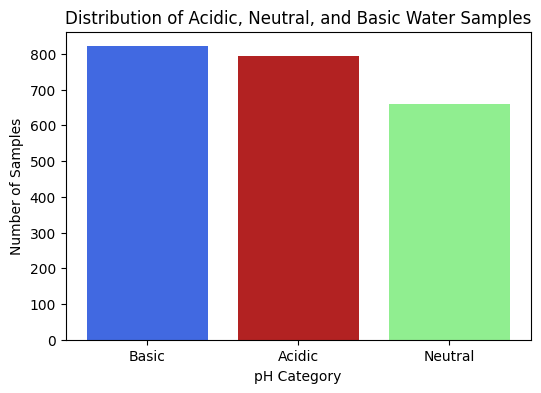

In [18]:
counts = df["pH_Category"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color=["royalblue", "firebrick","lightgreen"])
plt.xlabel("pH Category")
plt.ylabel("Number of Samples")
plt.title("Distribution of Acidic, Neutral, and Basic Water Samples")
plt.show()

What This Graph Shows:

This bar chart displays the distribution of water samples across three pH categories: acidic, neutral, and basic. Each bar represents the number of samples that fall into each classification based on their measured pH values.

Why This Matters Scientifically:

pH is a key indicator of water quality because it influences chemical solubility, biological activity, and ecosystem health. Understanding how many samples fall into each pH category helps identify whether a water system is stable, experiencing acidification, or trending toward alkalinity. This type of visualization supports environmental assessment by highlighting potential areas of concern and guiding further investigation.

In [19]:
# Basic analysis of the pH category distribution

counts = df["pH_Category"].value_counts()

print("Sample counts by pH category:")
print(counts)

# Interpretation
most_common = counts.idxmax()
least_common = counts.idxmin()

print("\nMost common category:", most_common)
print("Least common category:", least_common)

print(f"\nInterpretation: The dataset shows that {most_common.lower()} conditions occur most frequently, "
      f"while {least_common.lower()} conditions are the least represented. "
      "This distribution can help indicate whether the water system tends to be more acidic, neutral, or basic overall.")


Sample counts by pH category:
pH_Category
Basic      821
Acidic     795
Neutral    660
Name: count, dtype: int64

Most common category: Basic
Least common category: Neutral

Interpretation: The dataset shows that basic conditions occur most frequently, while neutral conditions are the least represented. This distribution can help indicate whether the water system tends to be more acidic, neutral, or basic overall.
